In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('session_data.csv')

In [3]:
data

,session_id,product_name
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber
2,0013eab657eaf2d82d7f1e13023d95c2,onion
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk
4,0013fabde1e543dd541be925266aadbc,dates
...,...,...
345147,ffb73de5b022d80d23ec72a7ce8226fe,long shelf life milk
345148,ffb73de5b022d80d23ec72a7ce8226fe,nectar juices
345149,ffb73de5b022d80d23ec72a7ce8226fe,onion
345150,ffcb72279f578ca4cb32c089d8fe8aa4,rice


In [4]:
df = pd.DataFrame()
df['prod'] = data['product_name'].unique()

In [5]:
new_df = data

In [6]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
def get_item_embedding(item_name):
    return model.encode(item_name)
item_embeddings = np.array([get_item_embedding(item) for item in df['prod']])
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['category'] = kmeans.fit_predict(item_embeddings)

C:\Users\devan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [7]:
df

,prod,category
0,beetroot,0
1,cucumber,2
2,onion,0
3,long shelf life milk,2
4,dates,4
...,...,...
391,trimmers & epilators,3
392,table showpieces,4
393,oxymeter,7
394,plant based,2


In [8]:
df['category'].value_counts()

category
2    80
4    74
6    57
1    57
0    53
5    31
7    24
3    20
Name: count, dtype: int64

In [9]:
category_map = df.set_index('prod')['category'].to_dict()


In [10]:
category_map

{'beetroot': 0,
 'cucumber': 2,
 'onion': 0,
 'long shelf life milk': 2,
 'dates': 4,
 'matchbox': 4,
 'brinjal': 6,
 'gourds': 0,
 'notebook': 0,
 'rain accessories': 4,
 'earbuds': 4,
 'bhujia & sev': 6,
 'roasted chana & fried gram': 2,
 'wafer cubes': 4,
 'detergent powder': 7,
 'garlic': 2,
 'fresh cow milk': 2,
 'oats': 1,
 'male condoms': 4,
 'sooji & rawa': 6,
 'chocolates': 1,
 'cakes': 1,
 'perfume gift sets': 4,
 'almond': 2,
 'curd': 0,
 'chicken boneless cut': 1,
 'chocolate cone': 1,
 'shared pack chocolates': 1,
 'tender coconut': 2,
 'baby fruits': 2,
 'body soaps': 7,
 'watermelon': 2,
 'deodorant body spray': 5,
 'cream biscuits': 1,
 'chickpea & kabuli chana': 6,
 'buffalo ghee, pure ghee & desi ghee': 6,
 'fruit tub': 0,
 'soapcase dispensers & more': 7,
 'milk breads': 1,
 'coconut oil': 5,
 'laddu': 6,
 'hair color cream': 3,
 'soya chunks': 2,
 'diwali items': 4,
 'salt': 2,
 'cat wet food': 1,
 'flavoured crackers': 1,
 'premium chocolates': 1,
 'gulab jamun pre

In [11]:
new_df

,session_id,product_name
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber
2,0013eab657eaf2d82d7f1e13023d95c2,onion
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk
4,0013fabde1e543dd541be925266aadbc,dates
...,...,...
345147,ffb73de5b022d80d23ec72a7ce8226fe,long shelf life milk
345148,ffb73de5b022d80d23ec72a7ce8226fe,nectar juices
345149,ffb73de5b022d80d23ec72a7ce8226fe,onion
345150,ffcb72279f578ca4cb32c089d8fe8aa4,rice


In [12]:
# Add a new 'category' column to the data dataframe using the category_map
new_df['category'] = new_df['product_name'].map(category_map)

In [13]:
new_df

,session_id,product_name,category
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot,0
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber,2
2,0013eab657eaf2d82d7f1e13023d95c2,onion,0
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk,2
4,0013fabde1e543dd541be925266aadbc,dates,4
...,...,...,...
345147,ffb73de5b022d80d23ec72a7ce8226fe,long shelf life milk,2
345148,ffb73de5b022d80d23ec72a7ce8226fe,nectar juices,2
345149,ffb73de5b022d80d23ec72a7ce8226fe,onion,0
345150,ffcb72279f578ca4cb32c089d8fe8aa4,rice,2


In [14]:
# Create co-occurrence matrix
co_occurrence_matrix = pd.crosstab(index=new_df['session_id'], columns=new_df['product_name'])
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)
np.fill_diagonal(co_occurrence_matrix.values, 0)

In [15]:
def get_product_category(product, new_df):
    try:
        return new_df[new_df['product_name'] == product]['category'].values[0]
    except IndexError:
        return None

In [16]:
def recommend_products(product, co_occurrence_matrix, new_df, top_n=5):
    if product not in co_occurrence_matrix.index:
        return pd.DataFrame(columns=['product', 'score'])
    
    # Get the similarity scores
    scores = co_occurrence_matrix[product]
    
    # Sort and filter based on category
    recommendations = scores.sort_values(ascending=False)
    
    product_category = get_product_category(product, new_df)
    if product_category:
        recommendations = recommendations[[
            p for p in recommendations.index 
            if get_product_category(p, new_df) == product_category
        ]]
    
    return recommendations.head(top_n)

In [17]:
def recommend_based_on_cart(cart_items, co_occurrence_matrix, new_df, top_n=5):
    all_recommendations = pd.Series()
    
    for item in cart_items:
        recommendations = recommend_products(item, co_occurrence_matrix, new_df, top_n)
        all_recommendations = pd.concat([all_recommendations, recommendations])
    
    # Aggregate and filter
    recommendation_scores = all_recommendations.groupby(all_recommendations.index).sum()
    
    # Filter by category for all products in the cart
    categories = {get_product_category(item, new_df) for item in cart_items}
    filtered_recommendations = recommendation_scores[
        [get_product_category(p, new_df) in categories for p in recommendation_scores.index]
    ]
    
    # Exclude items that are already in the cart
    filtered_recommendations = filtered_recommendations[~filtered_recommendations.index.isin(cart_items)]
    
    
    # Ensure we get top N recommendations
    filtered_recommendations = filtered_recommendations.sort_values(ascending=False).head(top_n)
    
    return filtered_recommendations

In [18]:
cart_items = ['curd','dates','long shelf life milk']
cart_recommendations = recommend_based_on_cart(cart_items, co_occurrence_matrix, new_df, top_n=5)
print(cart_recommendations)

fresh cow milk    4967
cucumber          1819
beetroot          1210
garlic            1150
gourds            1065
dtype: int64


In [19]:
category_data = new_df[new_df['category'] == 1]

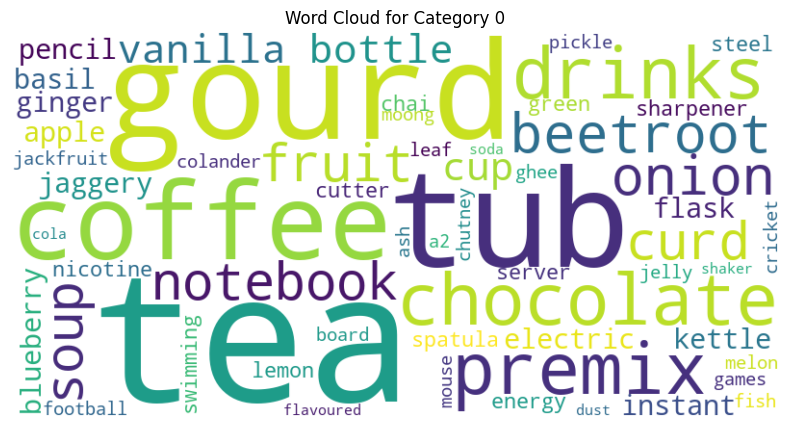

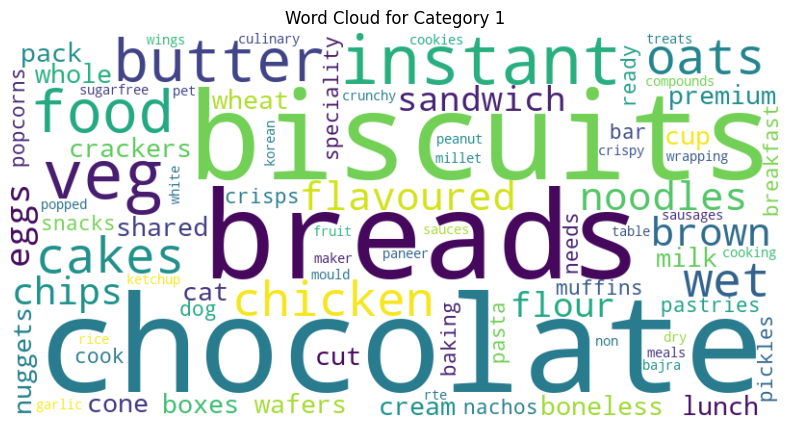

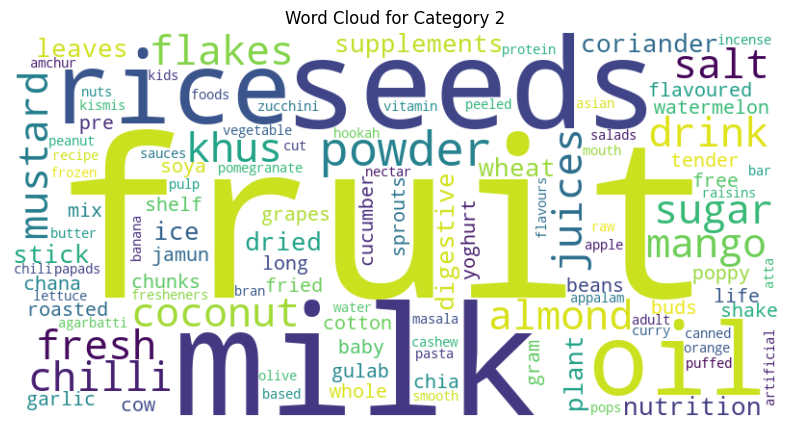

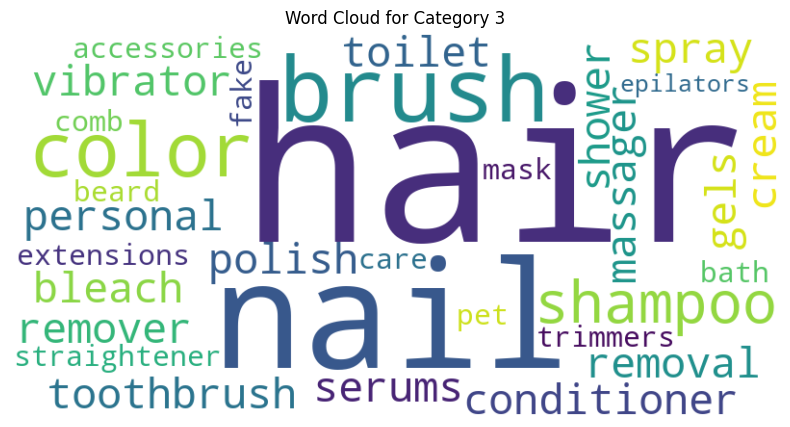

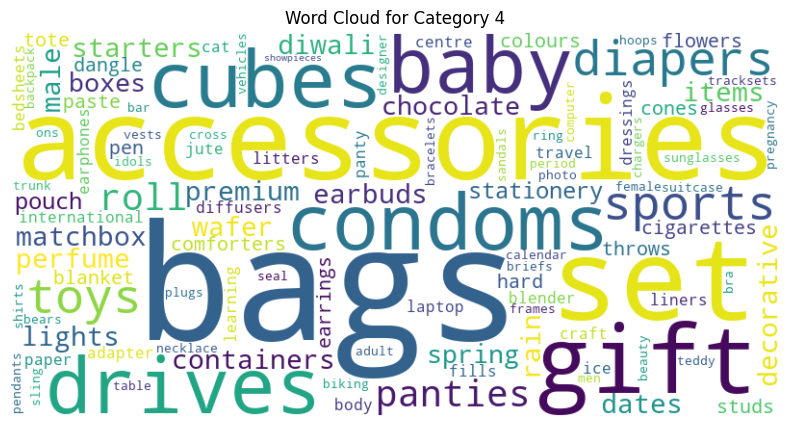

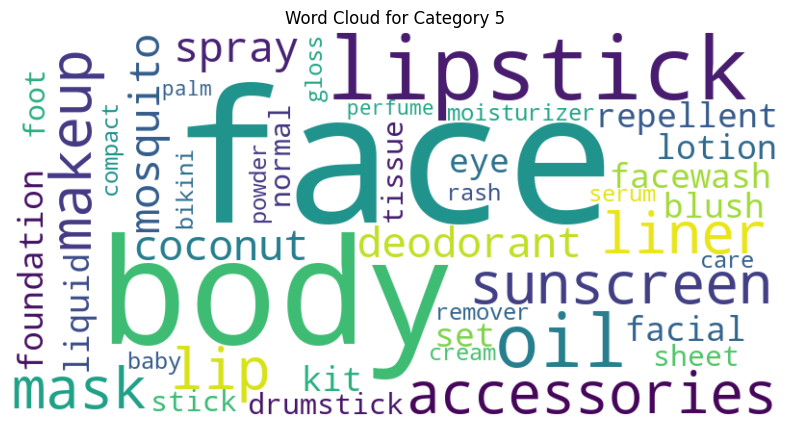

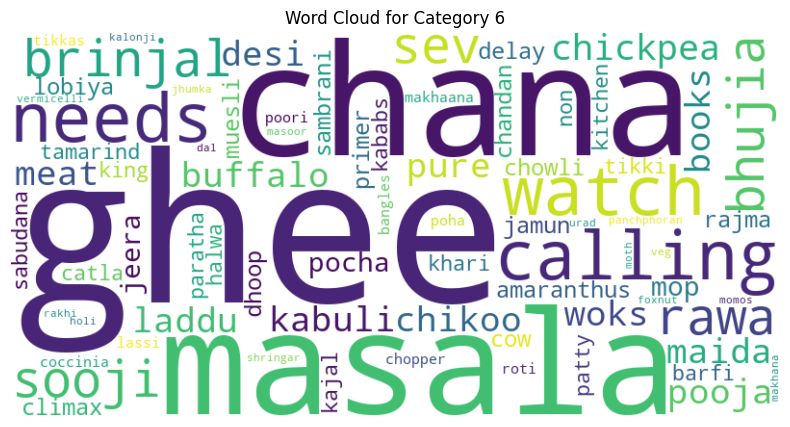

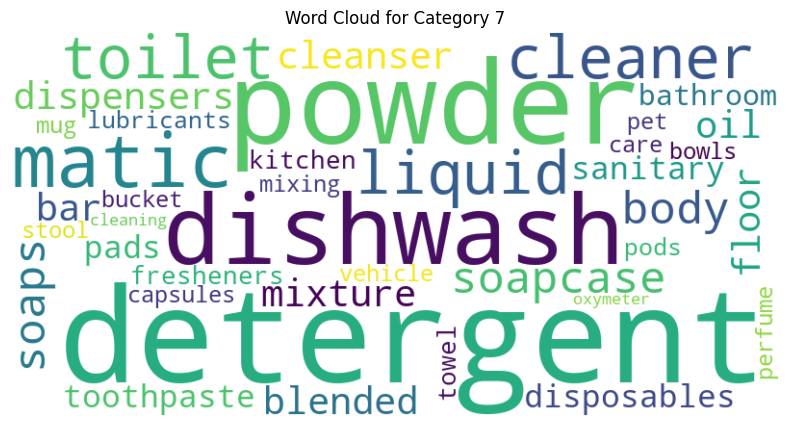

In [20]:
# Grouping items by category
grouped_item = df.groupby('category')['prod'].apply(list)

# Generating and displaying word clouds
for category, products in grouped_item.items():
    text = ' '.join(products)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category {category}')
    plt.axis('off')
    plt.show()

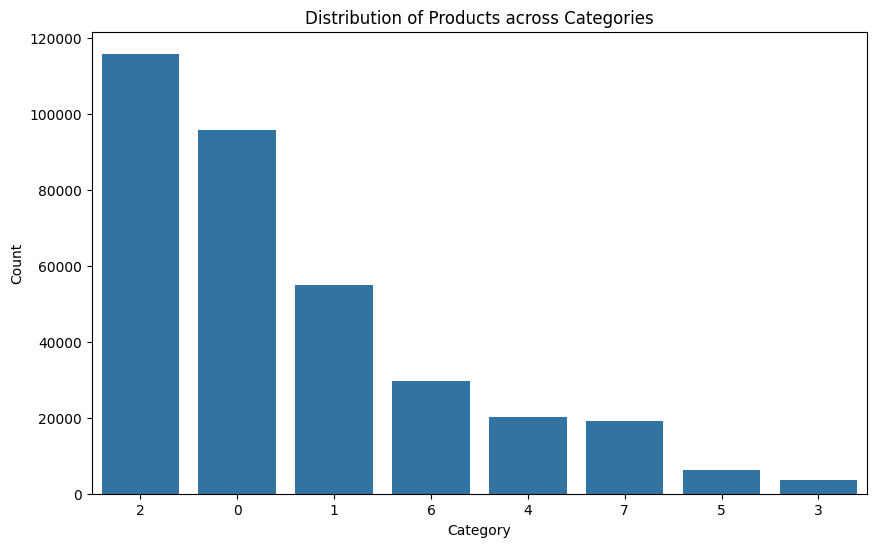

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=new_df, order=new_df['category'].value_counts().index)
plt.title('Distribution of Products across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [22]:
data

,session_id,product_name,category
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot,0
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber,2
2,0013eab657eaf2d82d7f1e13023d95c2,onion,0
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk,2
4,0013fabde1e543dd541be925266aadbc,dates,4
...,...,...,...
345147,ffb73de5b022d80d23ec72a7ce8226fe,long shelf life milk,2
345148,ffb73de5b022d80d23ec72a7ce8226fe,nectar juices,2
345149,ffb73de5b022d80d23ec72a7ce8226fe,onion,0
345150,ffcb72279f578ca4cb32c089d8fe8aa4,rice,2


In [23]:
data_new=data['session_id'].unique()

In [24]:
data_new.size

165335

In [25]:
products_per_session = data.groupby('session_id').size()

In [26]:
average_products_per_session = products_per_session.mean()

In [27]:
average_products_per_session

2.0875918589530347